<h1> Session 1 - Introduction to Recommenders</h1>

This is the first session in the recommendation systems series.
In this part we perform some data visualization for the Movie Lens dataset

The Movie Lens dataset can be downloaded from https://grouplens.org/datasets/movielens/

<h3> Step 1 - Import the required packages </h3>

Import the require packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3> Step 2 - Update the data files into Azure Notebooks </h3>

<img src="https://notebooks.azure.com/content/jupyter-data-tab.gif">

<h3> Step 3 - Load the data from multiple files into data frames </h3>

Load the data from the multiple files into several dataframes

- u.info file contains information about the dataset
- u.user file contains a list of all the users
- u.occupation file contains information regarding the occupation of the users
- u.genre file contains information regarding the genre of the movies (including their count)
- u.item file contains a list of all the movie items
- u.data file contains a list of 100,000 ratings made by 943 users on 1682 movie items

In [2]:
# Column headers for the dataset
data_cols = ['user id','movie id','rating','timestamp']
item_cols = ['movie id','movie title','release date', 'video release date','IMDb URL','unknown','Action', 'Adventure','Animation','Childrens','Comedy','Crime', 'Documentary','Drama','Fantasy','Film-Noir','Horror', 'Musical','Mystery','Romance ','Sci-Fi','Thriller', 'War' ,'Western']
user_cols = ['user id','age','gender','occupation', 'zip code']


# General information about dataset
df_u_info = pd.read_csv('/home/nbuser/library/u.info', header=None, sep=' ')

# List of users
df_u_user = pd.read_csv('/home/nbuser/library/u.user', header=None, sep='|', names=user_cols, encoding='latin-1')

# List of user occupation
df_u_occupation = pd.read_csv('/home/nbuser/library/u.occupation', header=None)

# List of movie genre (and movie count by genre)
df_u_genre = pd.read_csv('/home/nbuser/library/u.genre', sep='|', header=None)

# List of movie items
#df_u_item = pd.read_csv('/home/nbuser/library/u.item', header=None, sep='|', names=item_cols, encoding='latin-1')

# Transactional user data
df_u_data = pd.read_csv('/home/nbuser/library/u.data', header=None, sep='\t', names=data_cols, encoding='latin-1')

<h3>Step 4 - Analyze the dataframe</h3>

Determine the datatype of the data that is being used.

In [3]:
type(df_u_info)

pandas.core.frame.DataFrame

Check the columns in a dataframe (only those that actually have a header row

In [5]:
#df_u_user.columns
df_u_data.columns

Index(['UserID', 'ItemId', 'Rating', 'Timestamp'], dtype='object')

For each dataframe, display a sample set of records from the begining.

In [8]:
#df_u_info.head()
df_u_data.head(100)
#df_u_occupation.head()
#df_u_genre.head()

,UserID,ItemId,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


For each dataframe, display a sample set of records from the bottom.

In [9]:
df_u_data.tail(10)

,UserID,ItemId,Rating,Timestamp
99990,806,421,4,882388897
99991,676,538,4,892685437
99992,721,262,3,877137285
99993,913,209,2,881367150
99994,378,78,3,880056976
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


If all the records need to be displayed, then simply type the dataframe name

In [10]:
df_u_occupation

,0
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


<h3>Step 5 - Aggregate Level Analysis</h3>

The above analysis focused on the individual records of the dataframe. However, at times aggregate analysis needs to be done too. For this, aggregate functions of the dataframe can be used.

Count the number of records for a given column.

In [11]:
df_u_data['Rating'].count()

100000

Count the number of movie items, for each rating.

In [12]:
df_u_data.groupby(['Rating'])['ItemId'].count()

Rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: ItemId, dtype: int64

Count the number of ratings given, for each movie items

In [13]:
df_u_data.groupby(['ItemId'])['Rating'].count()

ItemId
1       452
2       131
3        90
4       209
5        86
6        26
7       392
8       219
9       299
10       89
11      236
12      267
13      184
14      183
15      293
16       39
17       92
18       10
19       69
20       72
21       84
22      297
23      182
24      174
25      293
26       73
27       57
28      276
29      114
30       37
       ... 
1653      1
1654      1
1655      1
1656      2
1657      1
1658      3
1659      1
1660      1
1661      1
1662      2
1663      1
1664      4
1665      1
1666      1
1667      1
1668      1
1669      1
1670      1
1671      1
1672      2
1673      1
1674      1
1675      1
1676      1
1677      1
1678      1
1679      1
1680      1
1681      1
1682      1
Name: Rating, Length: 1682, dtype: int64

Same query as above, but this time sorted by the ratings count and only show the top 5 values

In [14]:
df_u_data.groupby(['ItemId'])['Rating'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

,ItemId,count
49,50,583
257,258,509
99,100,508
180,181,507
293,294,485


Instead of count, other aggregate functions can also be used, like mean. So what is the average rating given by a user.

In [ ]:
df_u_data.groupby(['UserID'])['Rating'].mean()

A simple mathematical function, with no aggregation on a column.

In [ ]:
df_u_data['Rating'].std()

<h3>Step 6 - Some basic plots</h3>

Create a simple histogram for the user activity, based on the rating criteria.

(array([  6110.,      0.,  11370.,      0.,      0.,  27145.,      0.,
         34174.,      0.,  21201.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

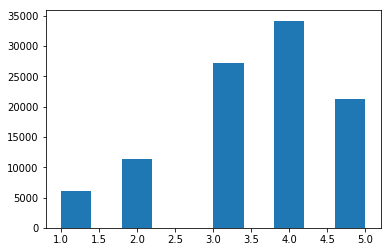

In [15]:
plt.hist(df_u_data['Rating'])

Create a more complicated histogram, this time with the movie items being the criteria.

(array([  1.14600000e+03,   2.49000000e+02,   1.39000000e+02,
          6.70000000e+01,   3.80000000e+01,   2.40000000e+01,
          7.00000000e+00,   5.00000000e+00,   6.00000000e+00,
          1.00000000e+00]),
 array([   1. ,   59.2,  117.4,  175.6,  233.8,  292. ,  350.2,  408.4,
         466.6,  524.8,  583. ]),
 <a list of 10 Patch objects>)

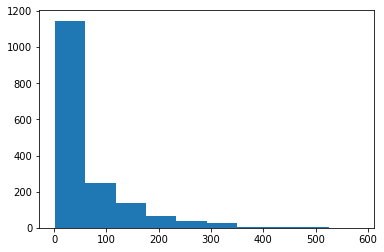

In [16]:
plt.hist(df_u_data.groupby(['ItemId'])['Rating'].count())

<h3>Step 7 - Additional plot types</h3>

Let's visualize the generated ratings over time. For this a time series plot is required that would show the ratings given by users over a time period.

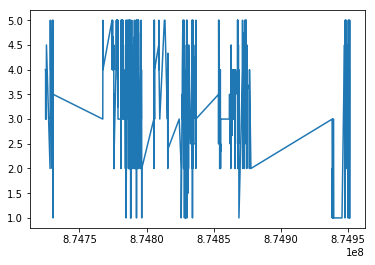

In [21]:
plt.plot(df_u_data.groupby(['Timestamp'])['Rating'].mean().head(1000))

Another type of plot is scatter plot. In this case we want to check the distribution of user ratings i.e. how are users more likely to rate a movie.

In the first step, we first get a Series structure using the DataFrame as source. This Series structure is then again converted into a modified DataFrame and then the scatter plot function is used to plot the reduced DataFrame.

In [22]:
gp_sr = df_u_data.groupby(['UserID'])['Rating'].mean().head(500)
gp_df = gp_sr.to_frame()
gp_df.reset_index(inplace=True)
gp_df.columns = ['UserID','M_Rating']

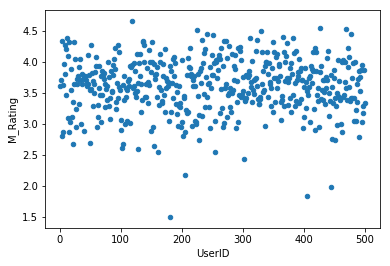

In [26]:
gp_df.plot(kind='scatter', x='UserID', y='M_Rating')